### Data Analysis

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## Visualization and Plotting related Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## NLP Libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from nltk.tokenize import sent_tokenize

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_scrpt = pd.read_csv("dataset/transcripts.csv")
df_scrpt.head(2)

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...


In [3]:
vectorizer = TfidfVectorizer(stop_words="english",max_df = 0.25, min_df = 0.02)
vectors = vectorizer.fit_transform(df_scrpt['transcript'])

In [4]:
vectors

<2467x3929 sparse matrix of type '<class 'numpy.float64'>'
	with 587482 stored elements in Compressed Sparse Row format>

In [5]:
vocab = vectorizer.get_feature_names()

In [6]:
len(vocab)

3929

In [7]:
vectors

<2467x3929 sparse matrix of type '<class 'numpy.float64'>'
	with 587482 stored elements in Compressed Sparse Row format>

In [8]:
vocab_sum = vectors.sum(axis=0)
vocab_sum.shape

(1, 3929)

In [9]:
data = []
for ind, word in enumerate(vocab):
        data.append((word, vocab_sum[0,ind]))

df_vocab = pd.DataFrame(data, columns=['word','rank'])
df_vocab.sort_values('rank',ascending=False,inplace=True)
df_vocab.head()

,word,rank
2347,music,57.173090
3887,women,54.391678
463,brain,48.903121
646,city,38.605268
987,design,37.740242


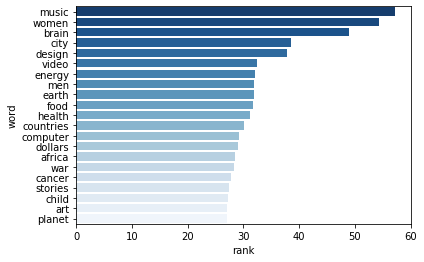

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=1)
sns.barplot(data=df_vocab[:21], x='rank',y='word', ax=ax, palette = 'Blues_r');

https://www.datacamp.com/community/tutorials/wordcloud-python

In [11]:
word_dict = dict(zip(df_vocab['word'],df_vocab['rank']))

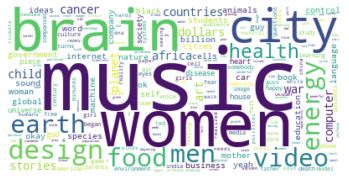

In [12]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_dict)

# Display the generated image:
# the argument interpolation="bilinear" in the plt.imshow(). This is to make the displayed image appear more smoothly. 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
wordcloud.to_file("word_rank.png")

https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

In [14]:
n = 14
nmf = NMF(n_components=n,random_state=0)

topics = nmf.fit_transform(vectors)
top_word = 6
topic_word, word_weight = {}, {}
for tid, t in enumerate(nmf.components_):
    topic_word[tid] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_word - 1:-1]]
    word_weight[tid] = t[t.argsort()[:-top_word - 1:-1]]

for key, val in topic_word.items():
    print(key, ": ", val)

0 :  ['god', 'stories', 'mother', 'father', 'book', 'felt']
1 :  ['music', 'sound', 'ends', 'song', 'musical', 'piece']
2 :  ['women', 'men', 'girls', 'woman', 'sex', 'gender']
3 :  ['cancer', 'cells', 'patients', 'disease', 'patient', 'cell']
4 :  ['africa', 'countries', 'dollars', 'business', 'india', 'growth']
5 :  ['universe', 'earth', 'planets', 'mars', 'planet', 'stars']
6 :  ['brain', 'neurons', 'brains', 'cells', 'cortex', 'activity']
7 :  ['city', 'cities', 'cars', 'urban', 'car', 'buildings']
8 :  ['design', 'designers', 'art', 'architecture', 'materials', 'designed']
9 :  ['ocean', 'species', 'animals', 'fish', 'sea', 'food']
10 :  ['war', 'government', 'political', 'democracy', 'rights', 'violence']
11 :  ['robot', 'robots', 'machines', 'legs', 'machine', 'robotic']
12 :  ['students', 'education', 'teachers', 'learning', 'teacher', 'schools']
13 :  ['computer', 'internet', 'video', 'machine', 'web', 'digital']


In [15]:
# r = 5
# c = 2
# fig, ax = plt.subplots(figsize=(12,16),nrows=r, ncols=c)
# plt.subplots_adjust(wspace  =  1, hspace  =  0.5)
# plt.xticks(rotation=90)

# i=0
# for j in range(r):
    
#     for k in range(c):
#         sns.barplot(x=topic_word[i], y=word_weight[i], palette="Blues_r", ax=ax[j][k])
#         i += 1
#     if i > 9:
#         break
        
# plt.show()

In [16]:
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

# talk = ted_main_df[ted_main_df['url']==transcripts_df['url'].iloc[document_id]]
# print('\nTrue tags from ted_main.csv: \n',talk['tags'])

scrpt0 = pipeline.transform([df_scrpt['transcript'].iloc[0]])

print("\n Topic Weight: ", scrpt0[0])
print("\n Relevant topic for the Transcript: ", np.argmax(scrpt0[0]))
print("\n Transcript: ", df_scrpt['transcript'].iloc[0][:1000], "...more")


 Topic Weight:  [0.05407948 0.02938081 0.02757135 0.         0.         0.01619547
 0.01848698 0.         0.00789693 0.00561622 0.         0.
 0.14795119 0.        ]

 Relevant topic for the Transcript:  12

 Transcript:  Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whole thing. In fact, I'm leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we've had and in all of the people here. Just the variety of it and the range of it. The second is that it's put us in a place where we have no idea what's going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don't you? I find this very interesting. If you're at a dinner party, and you say you work in education — Actually, you'

In [17]:
topic = np.argmax(scrpt0)
print(topic)

12


In [27]:
df_scrpt['avg_sent_len'] = [sum(len(x.split()) for x in sentence)/len(sent_tokenize(y)) for y in df_scrpt['transcript']]

In [18]:
df_scrpt['topic'] = df_scrpt['transcript'].apply(lambda x: np.argmax(pipeline.transform([x]))+1)
df_scrpt['topic_tag'] =  df_scrpt['topic'].apply(lambda x: '-'.join(topic_word[x-1]))

,transcript,url,topic,topic_tag
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,13,students-education-teachers-learning-teacher-s...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,5,africa-countries-dollars-business-india-growth
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,14,computer-internet-video-machine-web-digital
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,8,city-cities-cars-urban-car-buildings
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,5,africa-countries-dollars-business-india-growth


In [28]:
df_scrpt.head()

,transcript,url,topic,topic_tag,avg_sent_len
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,13,students-education-teachers-learning-teacher-s...,58.072874
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,5,africa-countries-dollars-business-india-growth,107.044776
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,14,computer-internet-video-machine-web-digital,52.350365
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,8,city-cities-cars-urban-car-buildings,85.892216
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,5,africa-countries-dollars-business-india-growth,63.189427


In [29]:
df_scrpt.to_csv("dataset/processed_transcript.csv", index=False)

In [20]:
df_topic = pd.DataFrame()
df_topic['topic #'] = [x+1 for x in topic_word.keys()]
df_topic['topic tag'] = ['-'.join(x) for x in topic_word.values()]
df_topic.head()

,topic #,topic tag
0,1,god-stories-mother-father-book-felt
1,2,music-sound-ends-song-musical-piece
2,3,women-men-girls-woman-sex-gender
3,4,cancer-cells-patients-disease-patient-cell
4,5,africa-countries-dollars-business-india-growth


In [21]:
df_topic.to_csv("dataset/topics_transcript.csv", index=False)